<a href="https://colab.research.google.com/github/abdulwaheedTMU/Project2/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Data Processing

In [8]:

import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define input image shape and batch size
IMG_HEIGHT, IMG_WIDTH = 500, 500
BATCH_SIZE = 32

# Set up directories
train_dir = '/content/drive/MyDrive/Project2/Data/train'
validation_dir = '/content/drive/MyDrive/Project2/Data/valid'
test_dir = '/content/drive/MyDrive/Project2/Data/test'

# Define augmentation pipeline for training data
train_data_gen = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.RandomRotation(0.3),  # Randomly rotate images
    tf.keras.layers.RandomZoom(0.4),  # More aggressive zoom
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),  # Random flipping
    tf.keras.layers.RandomContrast(0.2)  # Adjust contrast
])

# Rescaling only for validation and test data
val_test_data_gen = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255)
])

# Create training dataset
train_dataset = image_dataset_from_directory(
    train_dir,
    labels="inferred",
    label_mode="categorical",  # Multi-class classification
    batch_size=BATCH_SIZE,
    image_size=(IMG_HEIGHT, IMG_WIDTH)
).map(lambda x, y: (train_data_gen(x, training=True), y))  # Apply augmentation pipeline

# Create validation dataset
validation_dataset = image_dataset_from_directory(
    validation_dir,
    labels="inferred",
    label_mode="categorical",
    batch_size=BATCH_SIZE,
    image_size=(IMG_HEIGHT, IMG_WIDTH)
).map(lambda x, y: (val_test_data_gen(x, training=False), y))  # Apply rescaling



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 1942 files belonging to 3 classes.
Found 431 files belonging to 3 classes.


Step 2: Neural Network Architecture Design

In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the model
model = models.Sequential()

# 1. Convolutional Layer + Max Pooling Layer
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(500, 500, 3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# 2. Add a second Convolutional Layer + Max Pooling Layer
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# 3. Add a third Convolutional Layer + Max Pooling Layer
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# 4. Flatten the output
model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))  # Increase neurons in Dense layer
model.add(layers.Dropout(0.5))  # Reduce dropout slightly to retain more features
model.add(layers.Dense(64, activation='relu'))  # Add an additional dense layer
model.add(layers.Dropout(0.5))


# 6. Output Layer
model.add(layers.Dense(3, activation='softmax'))  # 3 neurons for 3 classes

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display the model summary
model.summary()


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 498, 498, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 249, 249, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 247, 247, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 123, 123, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 121, 121, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 60, 60, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 460800)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │      58,982,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 59,084,227 (225.39 MB)

 Trainable params: 59,084,227 (225.39 MB)

 Non-trainable params: 0 (0.00 B)

Step 3: Hyperparameter Analysis

In [10]:
from tensorflow.keras import layers, models, optimizers

# Define model with tunable hyperparameters
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation=None, input_shape=(500, 500, 3)),  # No activation here
    layers.LeakyReLU(alpha=0.1),  # LeakyReLU activation
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),  # Standard ReLU for comparison
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='elu'),  # ELU for dense layer
    layers.Dropout(0.6),
    layers.Dense(3, activation='softmax')  # Softmax for final layer
])

# Compile with a different optimizer (e.g., RMSprop)
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model without EarlyStopping
history = model.fit(train_dataset, validation_data=validation_dataset, epochs=30)



Epoch 1/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 127s 2s/step - accuracy: 0.3770 - loss: 2.2744 - val_accuracy: 0.4200 - val_loss: 1.0689
Epoch 2/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 124s 2s/step - accuracy: 0.5366 - loss: 0.9757 - val_accuracy: 0.5290 - val_loss: 0.9934
Epoch 3/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 124s 2s/step - accuracy: 0.6056 - loss: 0.8622 - val_accuracy: 0.5800 - val_loss: 0.9506
Epoch 4/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 124s 2s/step - accuracy: 0.6417 - loss: 0.7772 - val_accuracy: 0.6288 - val_loss: 0.8013
Epoch 5/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 124s 2s/step - accuracy: 0.6459 - loss: 0.7719 - val_accuracy: 0.7193 - val_loss: 0.7022
Epoch 6/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 124s 2s/step - accuracy: 0.6714 - loss: 0.7266 - val_accuracy: 0.6775 - val_loss: 0.7737
Epoch 7/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 124s 2s/step - accuracy: 0.6847 - loss: 0.7269 - val_accuracy: 0.7169 - val_loss: 0.6787
Epoch 8/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 124s 2s/step - accuracy: 0.6931 - loss: 0.7062 - val_accuracy: 0.6218 - v

Step 4: Model Evaluation

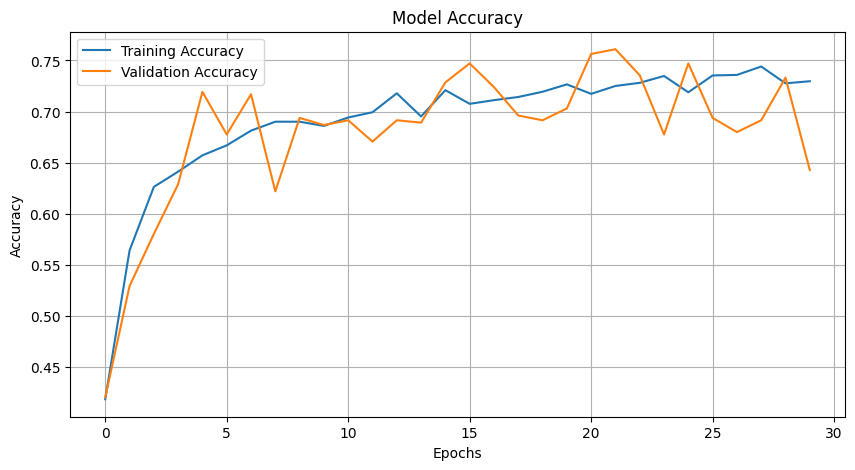

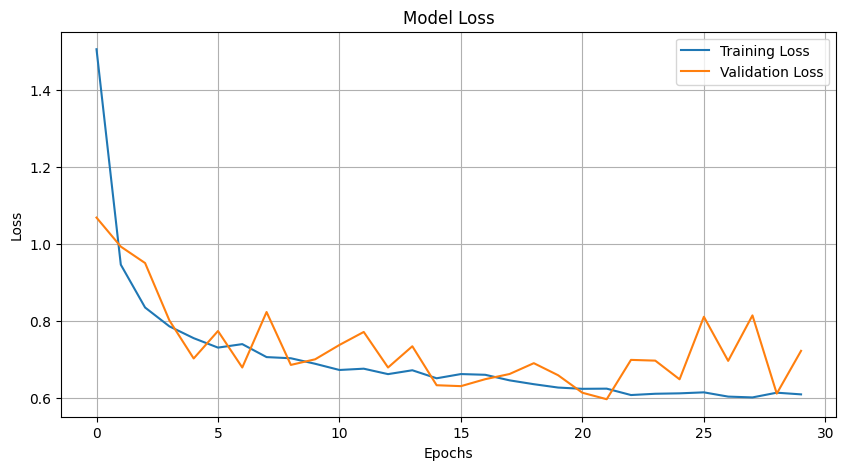

In [11]:
import matplotlib.pyplot as plt

# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


Step 5: Model Testing

In [15]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import os

# Define the class labels (update according to your model's training)
class_labels = ['Crack', 'Missing Head', 'Paint-off']

# Load a single test image
def process_and_predict_image(image_path, model):
    """
    Load and preprocess an image, then predict using the model.

    Args:
    - image_path (str): Path to the test image.
    - model: Trained TensorFlow/Keras model.

    Returns:
    - Predicted label and probabilities.
    """
    # Load the image and resize it to match the model input size
    img = image.load_img(image_path, target_size=(500, 500))

    # Convert the image to an array and normalize it
    img_array = image.img_to_array(img) / 255.0

    # Add an extra dimension to match the model input shape
    img_array = np.expand_dims(img_array, axis=0)

    # Predict class probabilities
    predictions = model.predict(img_array)

    # Get the class with the highest probability
    predicted_class = np.argmax(predictions, axis=1)[0]

    # Map predicted class index to class labels
    predicted_label = class_labels[predicted_class]

    return predicted_label, predictions[0]


# Visualize the predictions
def visualize_prediction(image_path, predicted_label, probabilities):
    """
    Display the test image with prediction results.

    Args:
    - image_path (str): Path to the test image.
    - predicted_label (str): Predicted class label.
    - probabilities (list): List of probabilities for each class.
    """
    # Load the image for visualization
    img = image.load_img(image_path, target_size=(500, 500))

    # Display the image
    plt.imshow(img)
    plt.axis('off')

    # Add text for predictions
    plt.title(f"True Label: Unknown\nPredicted Label: {predicted_label}\n"
              f"Crack: {probabilities[0] * 100:.1f}%, "
              f"Missing Head: {probabilities[1] * 100:.1f}%, "
              f"Paint-off: {probabilities[2] * 100:.1f}%")
    plt.show()


# Directory containing test images
test_images_dir = '/content/drive/MyDrive/Project2/Data/test'

# Loop through test images
for image_file in os.listdir(test_images_dir):
    # Construct full image path
    image_path = os.path.join(test_images_dir, image_file)

    # Skip non-image files
    if not image_path.endswith(('.jpg', '.png', '.jpeg')):
        continue

    # Process and predict the image
    predicted_label, probabilities = process_and_predict_image(image_path, model)

    # Visualize the prediction
    visualize_prediction(image_path, predicted_label, probabilities)

    # Optionally save or print detailed results
    print(f"Processed: {image_file}")
    print(f"Predicted Label: {predicted_label}")
    for i, label in enumerate(class_labels):
        print(f"{label}: {probabilities[i] * 100:.1f}%")
    print("-" * 50)
